2D rotation - a canonical version with an implicit NN interpolation
Be careful however, because ("*Timeo Danaos et dona ferentes!*"?). that is, Python thinks(?!) that '$\vartheta$ is $\theta$ == True' (and so are '$\varrho$' and '$\rho$', see ll. 39-40)!

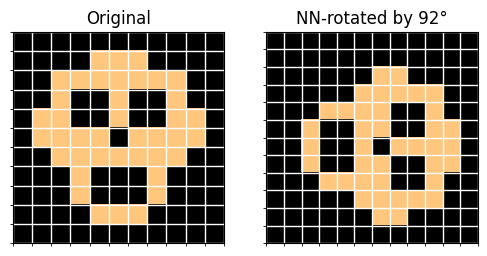

In [3]:
from interpolation import eddie
from auxiliary import displayImages as DI
from random import randrange as RR
from numpy import array, clip, empty
from math import sin, cos, pi
from sys import argv

## Setting...
#  A rotation angle α...
ϱ = RR(-180, 180) #°
α, Cu = ϱ * pi/180.0, 'copper' # Main and auxiliary variables

#  ... and a source image...  (cf. './rotation2D.py')
img = eddie; M = len(img); N = M + 1 #M << 0b011
out = empty((N, N))
# ... and rotation of ϑ = [x, y].T, w.r.t. OXY and through that angle: https://youtu.be/eV7UI_WX54c?t=191
OXY, Rα = array([M/2, M/2]), array([[cos(α), -sin(α)],  #              https://youtu.be/eV7UI_WX54c?t=361
                                    [sin(α),  cos(α)]]) # '+' clockwise

for n in range(N):
    for m in range(N):
        ϑ = array([n/N, m/N]) * M - OXY
        ϑ = Rα @ ϑ + OXY
        x, y = clip(ϑ, 0, M - 1).astype(int) # where the NNs dwell
        out[n, m] = img[x, y]                # cf. rotation2D.py's '... = f(x, y, img, Π)'
DI((img, out), ('Original', f'NN-rotated by {ρ}°'), cmp = Cu)